> **ALGORITMO DE MACHINE LEARNING: REGRESIÓN LINEAL**
---

Aplicación del algoritmo de Regresión Lineal para obtener el valor de la ganancia de retroalimentación de la velocidad angular del motor en base a la inercia total sumado de la inercia del motor y la carga.

> Importación y Análisis de Data
---

In [1]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.linear_model import LinearRegression       # LIBRERÍA PARA IMPLEMENTAR REGRESIÓN LINEAL
from sklearn.preprocessing import PolynomialFeatures    # LIBRERÍA PARA LINEALIZAR POLINOMIOS
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import mean_squared_error          # LIBRERÍA PARA HALLAR EL ERROR CUADRÁTICO MEDIO
from sklearn.externals import joblib                    # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
%matplotlib inline

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "PP_CONTROL_MOTOR_DC/Dataset_Motor.xlsx"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_excel(fullpathDatos)

#Mostrar Datos
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1995,0.117811,2.026651,27828.389339
1996,0.117859,1.415655,13640.427254
1997,0.117906,2.026651,27850.673436
1998,0.117953,2.026651,27861.815484


In [7]:
data = data[data["Inercia_Total"] <= 0.08]
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1189,0.079797,0.229605,259.688392
1190,0.079844,0.229605,259.842612
1191,0.079891,0.229605,259.996832
1192,0.079938,0.229605,260.151053


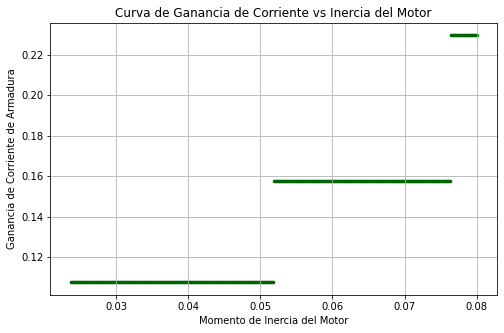

In [8]:
#GRÁFICA DE LA GANANCIA DE LA CORRIENTE VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", s = 5)
#plt.ylim([0,0.25])
plt.title("Curva de Ganancia de Corriente vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Corriente de Armadura")
plt.grid()
plt.show()

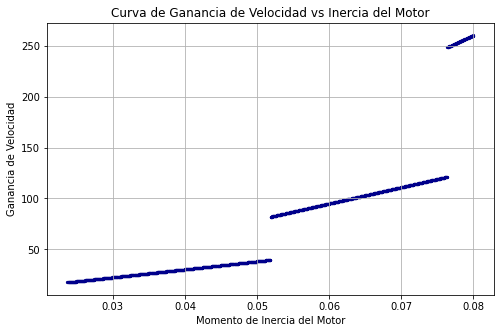

In [9]:
#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", s = 5)
#plt.ylim([0,270])
plt.title("Curva de Ganancia de Velocidad vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

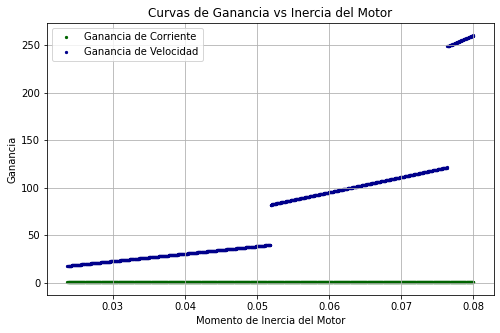

In [ ]:
#GRÁFICA DE LA GANANCIA VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", label = "Ganancia de Corriente", s = 5)
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", label = "Ganancia de Velocidad", s = 5)
#plt.ylim([0,270])
plt.title("Curvas de Ganancia vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()
plt.show()

> # 1. GANANCIA VELOCIDAD

> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Velocidad"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento de la Regresión Lineal y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total
Para un polinomio de grado  1  el mse es:  904.8974242295428
Para un polinomio de grado  2  el mse es:  560.665691219577
Para un polinomio de grado  3  el mse es:  503.89571499852644
Para un polinomio de grado  4  el mse es:  378.1427506473435
Para un polinomio de grado  5  el mse es:  220.7489254056189
Para un polinomio de grado  6  el mse es:  203.09273010984978
Para un polinomio de grado  7  el mse es:  193.84369034290083
Para un polinomio de grado  8  el mse es:  184.75285918281
Para un polinomio de grado  9  el mse es:  180.79576999425473
Para un polinomio de grado  10  el mse es:  180.6694654837923
Para un polinomio de grado  11  el mse es:  180.6498844073442
Para un polinomio de grado  12  el mse es:  180.64846436221202
Para un polinomio de grado  13  el mse es:  180.64840325104214
Para un polinomio de grado  14  el mse es:  180.64840143537853
Para un polinomio de grado  15  el mse es:  180.64840138167997
Para un polinomio de grado  16 

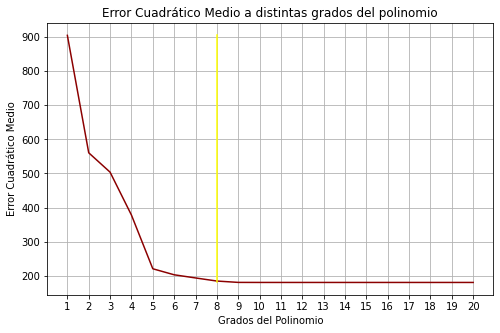

In [ ]:
#VALIDACIÓN CRUZADA PARA REGRESIÓN POLINOMIAL CON DISTINTOS GRADOS

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL GRADO DEL POLINOMIO
dMinimo = 1
dMaximo = 20+1
dPaso = 1

errorCuadraticoMedioList = []
ds = np.array(range(dAMinimo,dMaximo,dPaso))

for d in range(dMinimo,dMaximo,dPaso):
  poly = PolynomialFeatures(degree = d)
  X_lineal = poly.fit_transform(X_train)
  X_totalLineal = poly.fit_transform(X)

  polinomial = LinearRegression()
  polinomial.fit(X_lineal,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(polinomial, X_totalLineal, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un polinomio de grado ", d, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(ds, errorCuadraticoMedio, c = "darkred")
plt.plot(8*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas grados del polinomio")
plt.xlabel("Grados del Polinomio")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(ds)
plt.grid()
plt.show()

In [ ]:
dAceptado = 8

poly = PolynomialFeatures(degree = dAceptado)
X_lineal = poly.fit_transform(X_train)
polinomial = LinearRegression().fit(X_lineal,Y_train) 

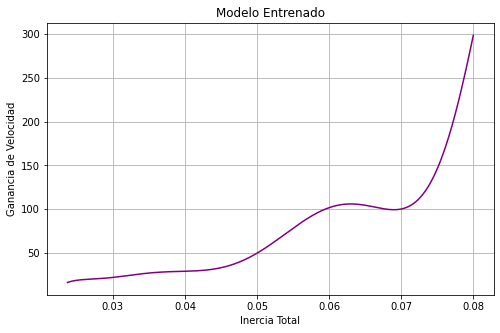

In [ ]:
Y_predtotal = polinomial.predict(poly.fit_transform(X))
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

> Validación de la Regresión Lineal
---

In [ ]:
# ERROR CUADRÁTICO MEDIO
X_testLineal = poly.fit_transform(X_test)
Y_pred = polinomial.predict(X_testLineal)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = polinomial.score(X_testLineal,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD         #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de Determinación R2 score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  239.65972139911838
El coeficiente de Determinación R2 score es:  93.96200504632942 %
El error estándar residual es:  18.8307278982117


> Exportar Modelo de Regresión Lineal
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Velocidad.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(polinomial,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Velocidad.pkl']

> # 2. GANANCIA CORRIENTE

> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Corriente"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento de la Regresión Lineal y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total
Para un polinomio de grado  1  el mse es:  0.00032000077126193607
Para un polinomio de grado  2  el mse es:  0.0002490840822669736
Para un polinomio de grado  3  el mse es:  0.0002492332690439362
Para un polinomio de grado  4  el mse es:  0.00020671981598647683
Para un polinomio de grado  5  el mse es:  0.0001137264174352779
Para un polinomio de grado  6  el mse es:  0.00010954529386453184
Para un polinomio de grado  7  el mse es:  9.462084988833373e-05
Para un polinomio de grado  8  el mse es:  9.198222748902184e-05
Para un polinomio de grado  9  el mse es:  9.205269549779355e-05
Para un polinomio de grado  10  el mse es:  9.206659431968037e-05
Para un polinomio de grado  11  el mse es:  9.206871275982962e-05
Para un polinomio de grado  12  el mse es:  9.206886744067967e-05
Para un polinomio de grado  13  el mse es:  9.206887415177588e-05
Para un polinomio de grado  14  el mse es:  9.20688743557636e-05
Para un polinomio de grado  15  el mse e

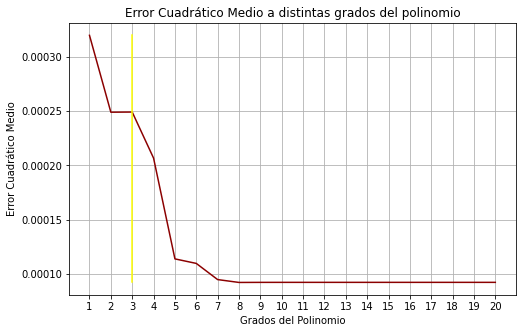

In [ ]:
#VALIDACIÓN CRUZADA PARA REGRESIÓN POLINOMIAL CON DISTINTOS GRADOS

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
dMinimo = 1
dMaximo = 20+1
dPaso = 1

errorCuadraticoMedioList = []
ds = np.array(range(dMinimo,dMaximo,dPaso))

for d in range(dMinimo,dMaximo,dPaso):
  poly = PolynomialFeatures(degree = d)
  X_lineal = poly.fit_transform(X_train)
  X_totalLineal = poly.fit_transform(X)

  polinomial = LinearRegression()
  polinomial.fit(X_lineal,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(polinomial, X_totalLineal, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un polinomio de grado ", d, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(ds, errorCuadraticoMedio, c = "darkred")
plt.plot(3*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas grados del polinomio")
plt.xlabel("Grados del Polinomio")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(ds)
plt.grid()
plt.show()

In [ ]:
dAceptado = 3 

poly = PolynomialFeatures(degree = dAceptado)
X_lineal = poly.fit_transform(X_train)
polinomial = LinearRegression().fit(X_lineal,Y_train) 

> Validación de la Regresión Lineal
---

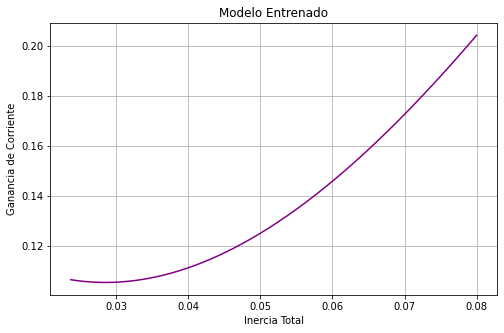

In [ ]:
Y_predtotal = polinomial.predict(poly.fit_transform(X))
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Corriente")
plt.grid()
plt.show()

In [ ]:
# ERROR CUADRÁTICO MEDIO
X_testLineal = poly.fit_transform(X_test)
Y_pred = polinomial.predict(X_testLineal)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = polinomial.score(X_testLineal,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD         #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de Determinación R2 score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  0.0002677177147137062
El coeficiente de Determinación R2 score es:  79.26484685204291 %
El error estándar residual es:  5.904797795912555


> Exportar Modelo de Regresión Lineal
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Corriente.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(polinomial,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Corriente.pkl']